# **Ford GoBike System Data Exploration**

In [140]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np
import plotly
import plotly.express as px

%matplotlib inline

In [21]:
data = pd.read_csv('./ford.csv')
data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


## Preliminary Wrangling

First, I am going to see if there are any NA or null or duplicate values and if there are drop those rows/columns and add some new columns if needed.

In [22]:
data.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [23]:
data.dropna(inplace=True)       ## drop rows with NA values

In [24]:
data.duplicated().sum()          ## check for duplicate data

0

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  member_ge

I am going to convert the start_time,end_time column into datetime format

In [26]:
data['start_time'] = pd.to_datetime(data['start_time'])    ## converting to datetime format
data['end_time'] = pd.to_datetime(data['end_time'])

In [27]:
data['start_time'].dt.year.unique()          ## shows only unique values


array([2019])

I will add a column named 'age'. All the year are 2019 and we can easily calculate the age of user by using the "member_birth_year" column

In [28]:
data['age'] = (2019-data['member_birth_year']).astype(int)

In [29]:
data['user_type'].unique()

array(['Customer', 'Subscriber'], dtype=object)

In [30]:
data['member_gender'].unique()

array(['Male', 'Other', 'Female'], dtype=object)

In [31]:
data['bike_share_for_all_trip'].unique()

array(['No', 'Yes'], dtype=object)

In [32]:
data['start_hour'] = data['start_time'].dt.hour

In [33]:
essential_data = data[['duration_sec','start_time','end_time','start_station_name','end_station_name','bike_id','user_type',
                      'member_birth_year','member_gender','bike_share_for_all_trip','age','start_hour']].copy()

In [34]:
essential_data.head()          ## taking only the useful data into another dataframe for analysis

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,start_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,35,17
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,47,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No,30,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,45,23
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,1959.0,Male,No,60,23


# **Univariate Exploration**

**Main feature of interest in the dataset:**
My main feature of interest in the dataset is understanding the duration of the trip. I expect this will be most affected by the age of user, age, start-end station and gender of the user

In [44]:
start_counts = essential_data['start_station_name'].value_counts().reset_index(name='number_of_trips')[:20]
start_counts.head()

,start_station_name,number_of_trips
0,Market St at 10th St,3649
1,San Francisco Caltrain Station 2 (Townsend St...,3408
2,Berry St at 4th St,2952
3,Montgomery St BART Station (Market St at 2nd St),2711
4,Powell St BART Station (Market St at 4th St),2620


In [51]:
start_counts = start_counts.drop('New_ID',axis=1)
start_counts.head()

,start_station_name,number_of_trips
0,Market St at 10th St,3649
1,San Francisco Caltrain Station 2 (Townsend St...,3408
2,Berry St at 4th St,2952
3,Montgomery St BART Station (Market St at 2nd St),2711
4,Powell St BART Station (Market St at 4th St),2620


In [52]:
start_counts.insert(0, 'New_ID', range(1, 1 + len(start_counts)))

In [58]:
start_counts.head()

,New_ID,start_station_name,number_of_trips
0,1,Market St at 10th St,3649
1,2,San Francisco Caltrain Station 2 (Townsend St...,3408
2,3,Berry St at 4th St,2952
3,4,Montgomery St BART Station (Market St at 2nd St),2711
4,5,Powell St BART Station (Market St at 4th St),2620


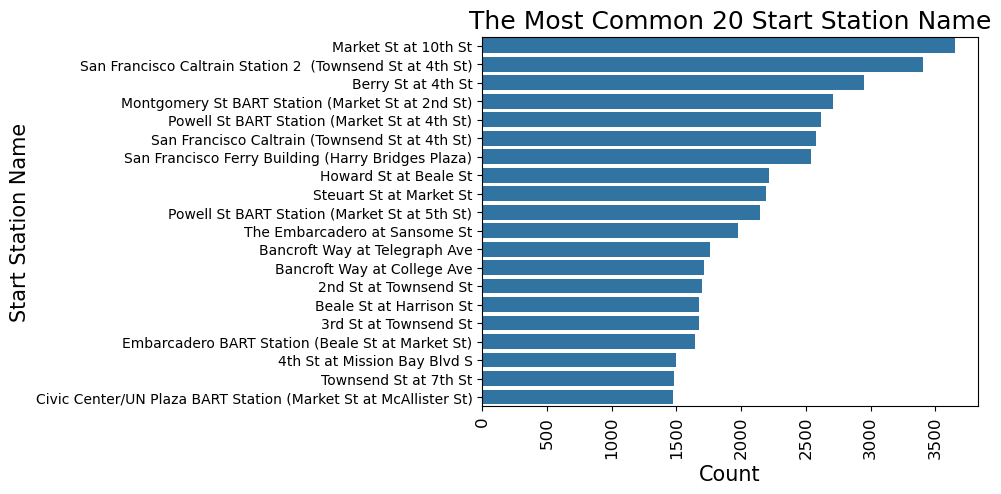

In [78]:
base_color=sns.color_palette()[0]
sns.barplot(x='number_of_trips',y='start_station_name',data=start_counts,color=base_color)
plt.xticks(rotation=90,size=12)
plt.xlabel('Count',size=15)
plt.ylabel('Start Station Name',size=15)
plt.title('The Most Common 20 Start Station Name',size=18)
plt.show()

In [80]:
end_counts = essential_data['end_station_name'].value_counts().reset_index(name='number_of_trips')[:20]
end_counts.head()

,end_station_name,number_of_trips
0,San Francisco Caltrain Station 2 (Townsend St...,4624
1,Market St at 10th St,3709
2,Montgomery St BART Station (Market St at 2nd St),3461
3,San Francisco Ferry Building (Harry Bridges Pl...,3151
4,San Francisco Caltrain (Townsend St at 4th St),2870


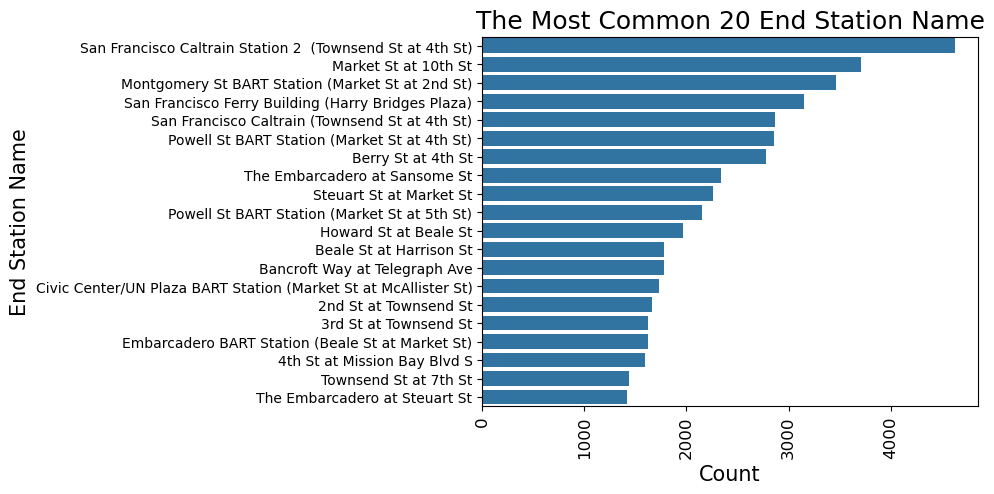

In [81]:
base_color=sns.color_palette()[0]
sns.barplot(x='number_of_trips',y='end_station_name',data=end_counts,color=base_color)
plt.xticks(rotation=90,size=12)
plt.xlabel('Count',size=15)
plt.ylabel('End Station Name',size=15)
plt.title('The Most Common 20 End Station Name',size=18)
plt.show()

In [82]:
essential_data[['duration_sec','age','start_hour']].describe()

,duration_sec,age,start_hour
count,174952.000000,174952.000000,174952.000000
mean,704.002744,34.196865,13.456165
std,1642.204905,10.118731,4.734282
min,61.000000,18.000000,0.000000
25%,323.000000,27.000000,9.000000
50%,510.000000,32.000000,14.000000
75%,789.000000,39.000000,17.000000
max,84548.000000,141.000000,23.000000


By looking at the data, it can be noticed that maximum age is 141 which seems improbable. I will be dropping any data above 90 years old.

In [83]:
essential_data = essential_data.query('age<90')

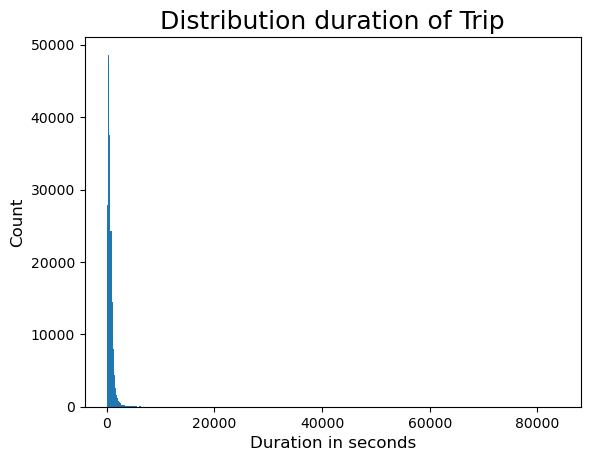

In [93]:
plt.hist(data=essential_data,x='duration_sec',bins=np.arange(60,84e3,200))       ##bins to get a non continous histogram
plt.xlabel('Duration in seconds',size=12)
plt.ylabel('Count',size=12)
plt.title('Distribution duration of Trip',size=18)
plt.show()

The curve has a very long right tail, so I'll use a logarithmic scale on the y-axis and set a limit to the x-axis to take a deeper look at the most frequent interval.

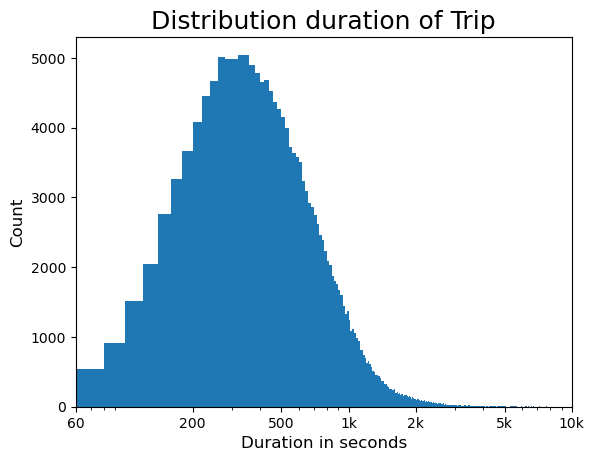

In [98]:
plt.hist(data=essential_data,x='duration_sec',bins=np.arange(60,1e4,20))        ##bins to get a non continous histogram
plt.xscale('log')
plt.xlim(60,1e4)
x_ticklocs=[60,200,500,1000,2000,5000,10000]
x_ticklabels=['60','200','500','1k','2k','5k','10k']
plt.xticks(x_ticklocs, x_ticklabels)
plt.xlabel('Duration in seconds',size=12)
plt.ylabel('Count',size=12)
plt.title('Distribution duration of Trip',size=18)
plt.show()

### **Detecting Outliers**

In [141]:
fig = px.box(essential_data, y='duration_sec')
fig.show()
plotly.offline.plot(fig, filename='./ford1.html')

'./ford1.html'

From the boxplot we can identify the outliers. By examining the plot it can be clearly inferred that data above 2000 seconds can be considered an outliers.

So, data below 2000 seconds in 'duration_sec' column are kept and anything above it removed. 

In [113]:
essential_data.shape

(174875, 12)

In [116]:
essential_data = essential_data.query('duration_sec<2000')

In [117]:
essential_data.shape

(170179, 12)

In [118]:
170179*100/174875

97.31465332380272

ERROR! Session/line number was not unique in database. History logging moved to new session 17


3% of the dataset is removed as outliers

In [119]:
essential_data.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,start_hour
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,45,23
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,1959.0,Male,No,60,23
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,Palm St at Willow St,San Jose Diridon Station,3803,Subscriber,1983.0,Female,No,36,23
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,Washington St at Kearny St,Valencia St at 21st St,6329,Subscriber,1989.0,Male,No,30,23
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,Washington St at Kearny St,Valencia St at 21st St,6548,Subscriber,1988.0,Other,No,31,23


Text(0.5, 1.0, 'Type of users')

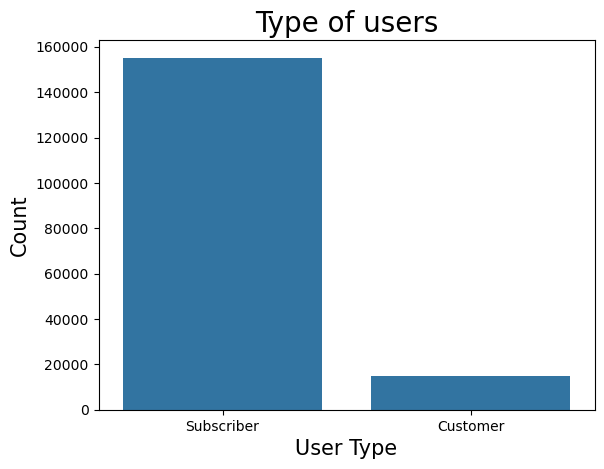

In [123]:
sns.countplot(data=essential_data,x='user_type',color=base_color)
plt.xlabel('User Type',size=15)
plt.ylabel('Count',size=15)
plt.title('Type of users',size=20)

Text(0.5, 1.0, 'The Gender of the Users')

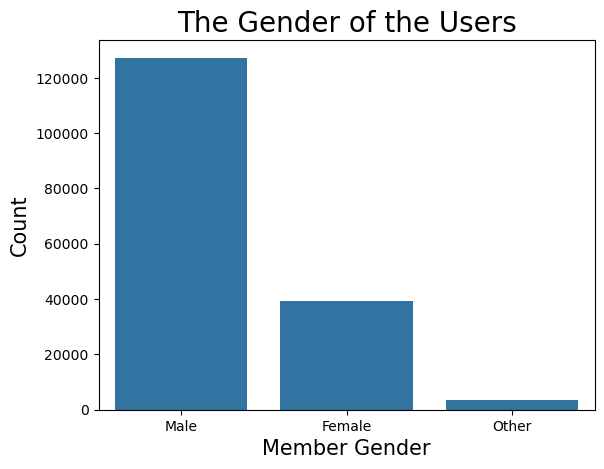

In [125]:
sns.countplot(data=essential_data,x='member_gender',color=base_color)
plt.xlabel('Member Gender',size=15)
plt.ylabel('Count',size=15)
plt.title('The Gender of the Users',size=20)

### **Age Distribution**

Text(0.5, 1.0, 'The Distribution of Age of the users')

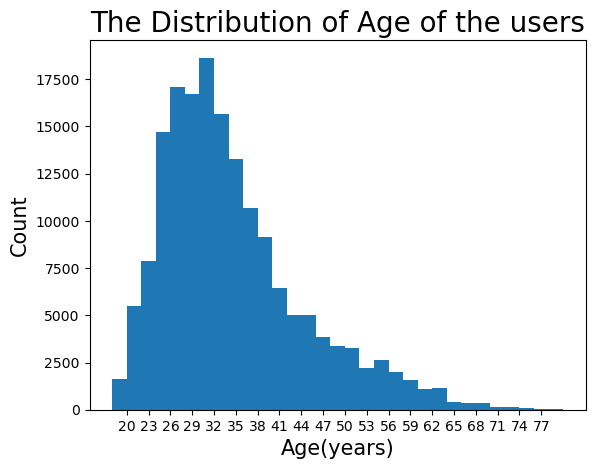

In [129]:
plt.hist(data=essential_data,x='age',bins=np.arange(18,81,2))
plt.xticks(np.arange(20,80,3))
plt.xlabel('Age(years)',size=15)
plt.ylabel('Count',size=15)
plt.title('The Distribution of Age of the users',size=20)

From the above histogram, it can observed that most users are in the category of 20 to 44 years old.

Text(0.5, 1.0, 'Distribution of start hour of the trip')

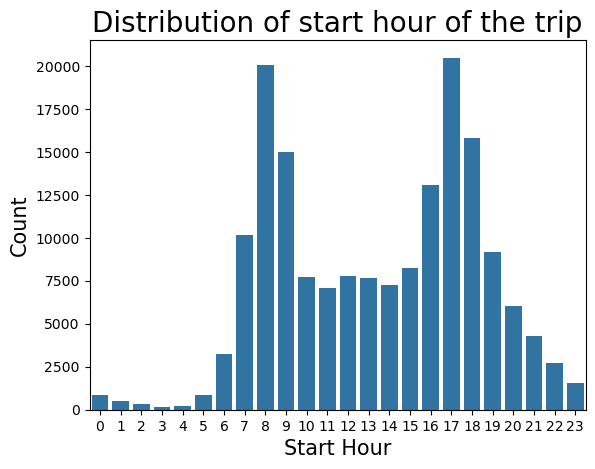

In [131]:
sns.countplot(data=essential_data,x='start_hour',color=base_color)
plt.xlabel('Start Hour',size=15)
plt.ylabel('Count',size=15)
plt.title('Distribution of start hour of the trip',size=20)

It can be observed that peak time of the start hour is 7-9 AM and 4-7 PM, which are generally the start and end of office hours which is in accordance with the data of age group in which maximum users are of the age of 20 to 47 years, i.e the working population.

So, based on this it can be assumed the the bikes are mostly used by working population to make commute.

# Bivariate Variable

Does age affect the duration of the trip?

<Axes: xlabel='age', ylabel='duration_sec'>

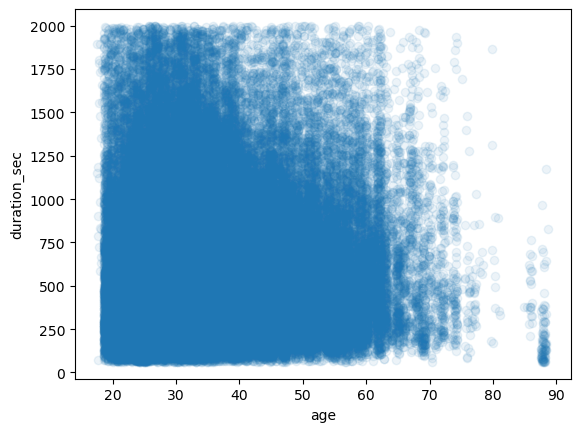

In [147]:
sns.regplot(data=essential_data,x='age',y='duration_sec',fit_reg=False,x_jitter=0.4,scatter_kws={'alpha':1/12})

The above scatter plot shows a weak relationship between age and duration. The older they got, especially past the age of 65, duration dropped considerably.

Text(0.5, 1.0, 'The Effect of User type on duration of trip')

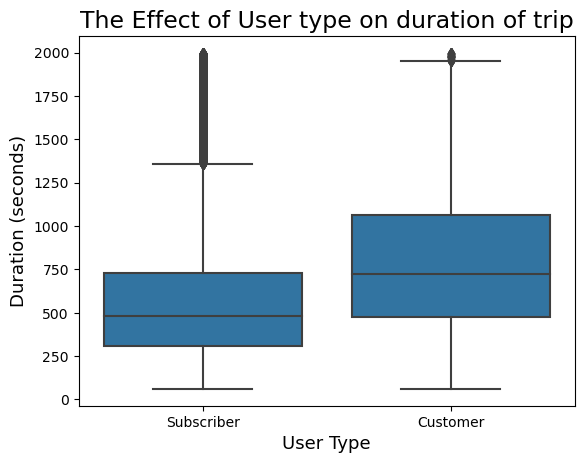

In [153]:
sns.boxplot(data=essential_data,x='user_type',y='duration_sec',color=base_color)
plt.xlabel('User Type',size=13)
plt.ylabel('Duration (seconds)',size=13)
plt.title('The Effect of User type on duration of trip',size=17)

Customers have longer trip duration than subscriber.

Text(0.5, 1.0, 'The Effect of User type on duration of trip')

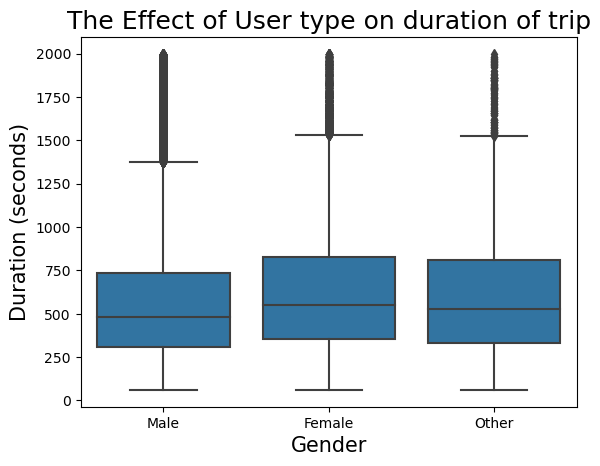

In [155]:
sns.boxplot(data=essential_data,x='member_gender',y='duration_sec',color=base_color)
plt.xlabel('Gender',size=15)
plt.ylabel('Duration (seconds)',size=15)
plt.title('The Effect of User type on duration of trip',size=18)

Males have a slightly shorter trip duration than others.